In [1]:
import matplotlib.pyplot as plt

In [2]:
from scipy.io import wavfile as wav

In [10]:
import numpy as np

In [3]:
rate, data = wav.read('dataset/DDBY - 近く远い斜め色の空.wav')

In [23]:
rate2, data2 = wav.read('dataset/Richard Clayderman - 水边的阿狄丽娜.wav')

In [4]:
%matplotlib inline

In [8]:
rate

44100

In [7]:
data.shape

(9860015, 2)

In [9]:
data[:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

In [21]:
np.min(data)

-31519

In [22]:
np.max(data)

30818

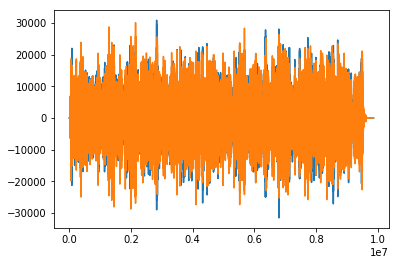

In [5]:
plt.plot(data)

In [205]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [206]:
%autoreload 2

In [211]:
from utilities import search_nearest

In [212]:
search_nearest(2.5, test_L)

2

In [26]:
np.mean(data), np.mean(data2)

(-0.51876290249051349, -63.019765852375812)

## WAV Spans

In [170]:
np.min(data), np.max(data)

(-31519, 30818)

In [172]:
np.min(data2), np.max(data2)

(-31656, 31725)

In [173]:
np.min(data3), np.max(data3)

(-17804, 16975)

In [174]:
np.min(data4), np.max(data4)

(-32768, 32767)

In [227]:
wav_max = 25000
wav_min = -wav_max
linespace = np.linspace(start=wav_min, stop=wav_max, num=3000)

def get_music_notation(value):
    return search_nearest(value, linespace)

In [354]:
test_data = data2[100000:300000]

In [385]:
len(data)

9860015

In [386]:
len(data2)

6997295

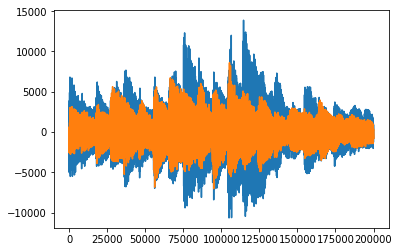

In [355]:
plt.plot(test_data)

In [356]:
wav.write(data=test_data, rate=rate2, filename='test_data_02.wav' )

In [357]:
v_func = np.vectorize(get_music_notation)

In [379]:
discrete_data_from_test_data = v_func(test_data)

In [361]:
from collections import Counter

In [362]:
len(discrete_data_from_test_data)

200000

In [380]:
discrete_data_from_test_data = list(map(tuple, list(discrete_data_from_test_data)))

In [381]:
notations_counter = Counter(list(discrete_data_from_test_data))

In [384]:
len(discrete_data_from_test_data)

200000

In [383]:
len(notations_counter)

107161

In [359]:
wav.write(data=discrete_data_from_test_data, rate=rate, filename='discrete_music.wav')

In [233]:
test_data[100]

array([-1834, -3693], dtype=int16)

In [220]:
np.min(test_data)

-24944

In [223]:
np.max(test_data)

23846

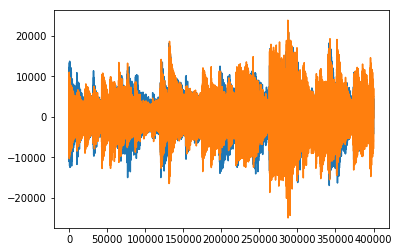

In [231]:
plt.plot(test_data)

## Scaling Data

In [240]:
from sklearn.preprocessing import MinMaxScaler

In [259]:
scalling_test_data = MinMaxScaler().fit_transform(test_data)

/Users/Minchiuan/anaconda3/envs/ai-lab/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [260]:
scalling_test_data *= 5000

In [261]:
scalling_test_data = scalling_test_data.astype(np.int32)

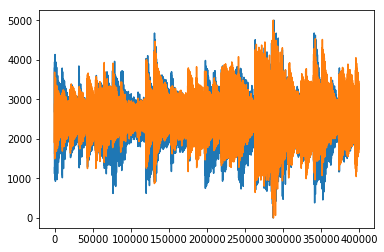

In [262]:
plt.plot(scalling_test_data)

In [271]:
import scipy

In [306]:
from scipy.ndimage.filters import gaussian_filter, median_filter

In [281]:
np.std(discrete_data_from_test_data)

3919.7547955499622

In [294]:
np.std(test_data)

3919.748987422864

In [303]:
gauss_filter_discreate = gaussian_filter(discrete_data_from_test_data, sigma=200)

In [307]:
median_filter_discrete = median_filter(discrete_data_from_test_data)

RuntimeError: no footprint or filter size provided

In [304]:
np.std(gauss_filter_discreate)

11.888615772598747

In [309]:
import scipy as sp

In [311]:
from scipy import signal

/Users/Minchiuan/anaconda3/envs/ai-lab/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [324]:
medfit_discrete = signal.medfilt(discrete_data_from_test_data)

In [325]:
test_data

array([[ -9660,  -6338],
       [ -9992,  -5948],
       [-10309,  -5584],
       ..., 
       [   633,  -1055],
       [   272,   -729],
       [  -108,   -390]], dtype=int16)

In [328]:
discrete_data_from_test_data[:50]

array([[ -9661.55385128,  -6343.78126042],
       [ -9994.99833278,  -5943.64788263],
       [-10311.7705902 ,  -5576.85895298],
       [-10578.52617539,  -5243.41447149],
       [-10761.92064021,  -4893.29776592],
       [-10878.62620874,  -4509.8366122 ],
       [-10928.64288096,  -4109.70323441],
       [-10895.29843281,  -3692.89763254],
       [-10745.24841614,  -3292.76425475],
       [-10445.14838279,  -2909.30310103],
       [ -9994.99833278,  -2509.16972324],
       [ -9411.47049016,  -2075.6918973 ],
       [ -8677.89263088,  -1592.19739913],
       [ -7844.28142714,  -1058.68622874],
       [ -6893.96465488,   -558.5195065 ],
       [ -5876.95898633,   -108.36945649],
       [ -4809.93664555,    241.74724908],
       [ -3809.60320107,    441.81393798],
       [ -2859.28642881,    508.50283428],
       [ -2009.003001  ,    458.48616205],
       [ -1275.42514171,    358.45281761],
       [  -641.88062688,    225.07502501],
       [  -125.04168056,    125.04168056],
       [   

In [329]:
medfit_discrete[:50]

array([[    0.        ,     0.        ],
       [-5943.64788263, -5943.64788263],
       [-5576.85895298, -5576.85895298],
       [-5243.41447149, -5243.41447149],
       [-4893.29776592, -4893.29776592],
       [-4509.8366122 , -4509.8366122 ],
       [-4109.70323441, -4109.70323441],
       [-3692.89763254, -3692.89763254],
       [-3292.76425475, -3292.76425475],
       [-2909.30310103, -2909.30310103],
       [-2509.16972324, -2509.16972324],
       [-2075.6918973 , -2075.6918973 ],
       [-1592.19739913, -1592.19739913],
       [-1058.68622874, -1058.68622874],
       [ -558.5195065 ,  -558.5195065 ],
       [ -108.36945649,  -108.36945649],
       [    0.        ,     0.        ],
       [    0.        ,     0.        ],
       [    0.        ,     0.        ],
       [    0.        ,     0.        ],
       [    0.        ,     0.        ],
       [    0.        ,     0.        ],
       [    0.        ,     0.        ],
       [   91.69723241,    91.69723241],
       [  141.71

In [332]:
wav.write(data=medfit_discrete, rate=rate, filename='median_discrete.wav')

In [337]:
noise = np.random.normal(1, 10, discrete_data_from_test_data.shape)

In [338]:
add_noise_discrete = discrete_data_from_test_data + noise

In [339]:
wav.write(data=add_noise_discrete, rate=rate, filename='add_noise_discrete.wav')

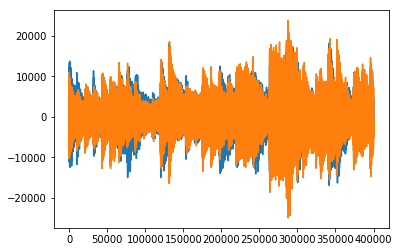

In [335]:
plt.plot(discrete_data_from_test_data)

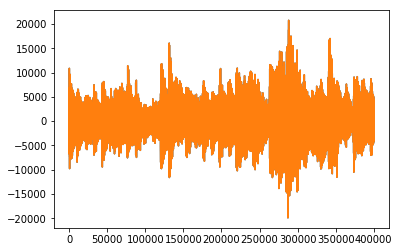

In [315]:
plt.plot(medfit_discrete)

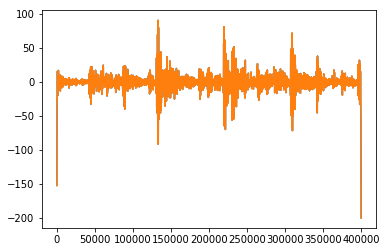

In [305]:
plt.plot(gauss_filter_discreate)

In [302]:
wav.write(data=gauss_filter_discreate, rate=rate, filename='gauss_filter.wav')

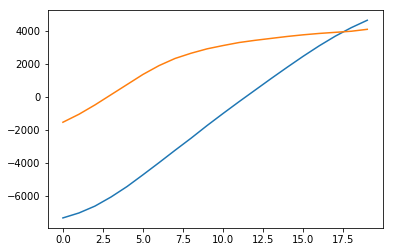

In [298]:
plt.plot(discrete_data_from_test_data[1000:1020])

In [264]:
wav.write(data=scalling_test_data, rate=rate, filename='scalling_data.wav')

In [107]:
d = data2
r = rate2

In [125]:
v_func = np.vectorize(change_a_continus_to_discrete)
test_data = data[100000:500000]
wav.write(data=test_data, rate=rate, filename='test_data_1_10k.wav')

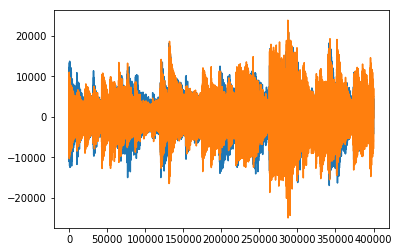

In [126]:
plt.plot(test_data)

In [108]:
indices = np.random.choice(np.arange(len(d)), size=int(len(d) * 0.1))
indices = sorted(indices)
random_data = d[indices]
wav.write(data=random_data, rate=rate//10, filename='new_data_1.wav')

In [71]:
for frame in data:
    a, b = frame
    new_music.append([change_a_continus_to_discrete(a), change_a_continus_to_discrete(b)])

KeyboardInterrupt: 

In [65]:
v_func = np.vectorize(change_a_continus_to_discrete)

In [67]:
new_data_1 = v_func(data)

KeyboardInterrupt: 

In [33]:
rate3, data3 = wav.read('dataset/王迟 - 葫芦金刚.wav')

In [37]:
np.max(data3), np.min(data3)

(16975, -17804)

In [38]:
rate4, data4 = wav.read('dataset/Nick Cave - To Be By Your Side.wav')

In [39]:
np.max(data4), np.min(data4)

(32767, -32768)

In [27]:
np.std(data), np.std(data2)

(3842.8603510620951, 2904.4226298709091)

In [25]:
np.max(data2), np.min(data2)

(31725, -31656)

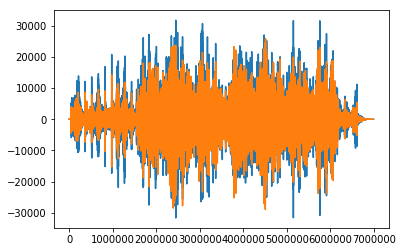

In [24]:
plt.plot(data2)